In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install wordcloud

In [ ]:
from google.colab import drive
#drive.mount("/content/drive")
#drive.mount("/content/drive", force_remount=true)

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Authentication
consumerKey = "hulJBb2O70JdX3qIGPyEyANQp"
consumerSecret = "QWHR5UPwFvLdPO3tDqbx7PNVRt6RkS5Hk0y4p1ILMZr1ythHR1"
accessToken = "1088432068403572738-l228RH1t7EiGBYLp6sBleg78cYEA70"
accessTokenSecret = "ZvudaJlvX3oByXPJB3TasKcrROvMFFcRYXxC3375tAfgb"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("")
noOfTweet = int(input (""))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

zanu pf
100


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  27
negative number:  43
neutral number:  30


In [ ]:
tweet_list

,0
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir..."
1,@ProfJNMoyo Thanks prof. Do you remember the Z...
2,@NewZimbabweCom Datawindi Zanu pf puppet
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...
4,RT @baron_mcdonald: This Youngman anonzi Panas...
...,...
95,@nickmangwana It's all because of Zanu pf fail...
96,@njabulodhlamin3 @ThebzaMduduzi @deemalaki @Ga...
97,Wild cheers as Chamisa warns Zanu PF at funera...
98,@BChigoz @ThebzaMduduzi @deemalaki @Ga58194222...


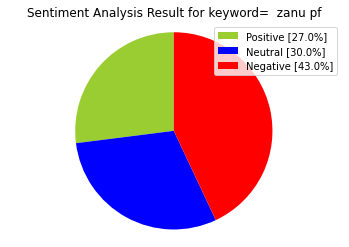

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

Type Markdown and LaTeX:  𝛼2 
#Extracting text values text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir...","@Jamwanda2 Zanu pf project,akasadaro haatambir..."
1,@ProfJNMoyo Thanks prof. Do you remember the Z...,@ProfJNMoyo Thanks prof. Do you remember the Z...
2,@NewZimbabweCom Datawindi Zanu pf puppet,@NewZimbabweCom Datawindi Zanu pf puppet
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...
4,RT @baron_mcdonald: This Youngman anonzi Panas...,RT @baron_mcdonald: This Youngman anonzi Panas...
...,...,...
95,@nickmangwana It's all because of Zanu pf fail...,@nickmangwana It's all because of Zanu pf fail...
96,@njabulodhlamin3 @ThebzaMduduzi @deemalaki @Ga...,@njabulodhlamin3 @ThebzaMduduzi @deemalaki @Ga...
97,Wild cheers as Chamisa warns Zanu PF at funera...,Wild cheers as Chamisa warns Zanu PF at funera...
98,@BChigoz @ThebzaMduduzi @deemalaki @Ga58194222...,@BChigoz @ThebzaMduduzi @deemalaki @Ga58194222...


In [ ]:
tweet_list

,0,text
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir...","@Jamwanda2 Zanu pf project,akasadaro haatambir..."
1,@ProfJNMoyo Thanks prof. Do you remember the Z...,@ProfJNMoyo Thanks prof. Do you remember the Z...
2,@NewZimbabweCom Datawindi Zanu pf puppet,@NewZimbabweCom Datawindi Zanu pf puppet
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...
4,RT @baron_mcdonald: This Youngman anonzi Panas...,RT @baron_mcdonald: This Youngman anonzi Panas...
...,...,...
95,@nickmangwana It's all because of Zanu pf fail...,@nickmangwana It's all because of Zanu pf fail...
96,@njabulodhlamin3 @ThebzaMduduzi @deemalaki @Ga...,@njabulodhlamin3 @ThebzaMduduzi @deemalaki @Ga...
97,Wild cheers as Chamisa warns Zanu PF at funera...,Wild cheers as Chamisa warns Zanu PF at funera...
98,@BChigoz @ThebzaMduduzi @deemalaki @Ga58194222...,@BChigoz @ThebzaMduduzi @deemalaki @Ga58194222...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir...",zanu pf project akasadaro haatambire zvimari...
1,@ProfJNMoyo Thanks prof. Do you remember the Z...,thanks prof do you remember the zanu pf man...
2,@NewZimbabweCom Datawindi Zanu pf puppet,datawindi zanu pf puppet
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,pf yl
4,RT @baron_mcdonald: This Youngman anonzi Panas...,this youngman anonzi panashemakufa made my da...
5,"@Jamwanda2 Mwonzora out of all the people, for...",mwonzora out of all the people forget that ...
6,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,pf yl
7,@daddyhope @BitiTendai Zanu pf haina kana nyad...,zanu pf haina kana nyadzi humbavha hwega h...
8,RT @PedzisaiRuhanya: Ethiopians are voting mas...,ethiopians are voting massively under war and...
9,RT @LHNewsZimbabwe: Some zanu pf supporters at...,some zanu pf supporters attempted to hijack a...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir...",zanu pf project akasadaro haatambire zvimari...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
1,@ProfJNMoyo Thanks prof. Do you remember the Z...,thanks prof do you remember the zanu pf man...,0.2,0.2,positive,0.000,0.861,0.139,0.4404
2,@NewZimbabweCom Datawindi Zanu pf puppet,datawindi zanu pf puppet,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,pf yl,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
4,RT @baron_mcdonald: This Youngman anonzi Panas...,this youngman anonzi panashemakufa made my da...,0.0,0.0,positive,0.000,0.865,0.135,0.3612
5,"@Jamwanda2 Mwonzora out of all the people, for...",mwonzora out of all the people forget that ...,0.0,0.0,negative,0.208,0.792,0.000,-0.6124
6,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,pf yl,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,@daddyhope @BitiTendai Zanu pf haina kana nyad...,zanu pf haina kana nyadzi humbavha hwega h...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,RT @PedzisaiRuhanya: Ethiopians are voting mas...,ethiopians are voting massively under war and...,0.0,1.0,positive,0.103,0.755,0.143,0.2382
9,RT @LHNewsZimbabwe: Some zanu pf supporters at...,some zanu pf supporters attempted to hijack a...,0.8,1.0,positive,0.000,0.751,0.249,0.7430


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,33,40.24
neutral,29,35.37
positive,20,24.39


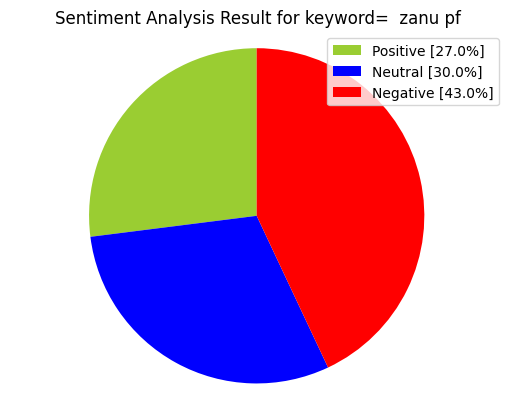

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,95.97
neutral,49.17
positive,107.05


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"@Jamwanda2 Zanu pf project,akasadaro haatambir...",zanu pf project akasadaro haatambire zvimari...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,79,10,zanu pf project akasadaro haatambire zvimari...,"[, zanu, pf, project, akasadaro, haatambire, z...","[, zanu, pf, project, akasadaro, haatambire, z...","[, zanu, pf, project, akasadaro, haatambir, zv..."
1,@ProfJNMoyo Thanks prof. Do you remember the Z...,thanks prof do you remember the zanu pf man...,0.2,0.2,positive,0.0,0.861,0.139,0.4404,108,19,thanks prof do you remember the zanu pf man...,"[, thanks, prof, do, you, remember, the, zanu,...","[, thanks, prof, remember, zanu, pf, manifesto...","[, thank, prof, rememb, zanu, pf, manifesto, e..."
2,@NewZimbabweCom Datawindi Zanu pf puppet,datawindi zanu pf puppet,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,26,4,datawindi zanu pf puppet,"[, datawindi, zanu, pf, puppet]","[, datawindi, zanu, pf, puppet]","[, datawindi, zanu, pf, puppet]"
3,@inehuchi @ParliamentZim @ZANU_PF_YL @OpenParl...,pf yl,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,26,2,pf yl,"[, pf, yl, ]","[, pf, yl, ]","[, pf, yl, ]"
4,RT @baron_mcdonald: This Youngman anonzi Panas...,this youngman anonzi panashemakufa made my da...,0.0,0.0,positive,0.0,0.865,0.135,0.3612,121,17,this youngman anonzi panashemakufa made my da...,"[, this, youngman, anonzi, panashemakufa, made...","[, youngman, anonzi, panashemakufa, made, day,...","[, youngman, anonzi, panashemakufa, made, day,..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

82 Number of reviews has 407 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,absolut,accid,activ,actual,address,affect,afrobaromet,agre,akasadaro,allianc,allow,alreadi,also,amongst,ana,anc,anonzi,anti,anyth,appli,appr,appreci,armi,asham,attempt,avoid,azanu,b,back,ball,ballot,ban,bdp,belong,benefit,best,bill,blame,blind,...,vanhu,via,vid,video,villag,vote,voter,walk,war,warn,warrantin,wast,well,whether,whole,wild,win,wipe,without,wooooooooooooow,would,wrong,ye,year,yet,yl,youngman,youth,zanu,zii,zim,zimbabw,zimbabwean,zivhu,zvamunopa,zvamuri,zvangu,zvenyu,zvimari,zvineropa
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pf,60
zanu,58
mdc,6
never,5
peopl,5
polit,5
even,5
offici,4
one,4
panashemakufa,4


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(5,5),100)

n2_bigrams

[('youngman anonzi panashemakufa day zanu', 2),
 ('anonzi panashemakufa day zanu pf', 2),
 ('panashemakufa day zanu pf ngaisadaro', 2),
 ('day zanu pf ngaisadaro video', 2),
 ('zanu pf ngaisadaro video courtesy', 2),
 ('pf ngaisadaro video courtesy panashemakufa', 2),
 ('ngaisadaro video courtesy panashemakufa tik', 2),
 ('video courtesy panashemakufa tik tok', 2),
 ('neopatrimonialism growing threat electoral democracy', 2),
 ('growing threat electoral democracy zim', 2),
 ('threat electoral democracy zim clear', 2),
 ('electoral democracy zim clear zanu', 2),
 ('democracy zim clear zanu pf', 2),
 ('say just reminded fathers wiped', 2),
 ('zanu pf project akasadaro haatambire', 1),
 ('pf project akasadaro haatambire zvimari', 1),
 ('project akasadaro haatambire zvimari zvenyu', 1),
 ('akasadaro haatambire zvimari zvenyu zvamunopa', 1),
 ('haatambire zvimari zvenyu zvamunopa vanhu', 1),
 ('zvimari zvenyu zvamunopa vanhu zvineropa', 1),
 ('thanks prof remember zanu pf', 1),
 ('prof reme

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(5,10),100)

n3_trigrams

[('youngman anonzi panashemakufa day zanu', 2),
 ('anonzi panashemakufa day zanu pf', 2),
 ('panashemakufa day zanu pf ngaisadaro', 2),
 ('day zanu pf ngaisadaro video', 2),
 ('zanu pf ngaisadaro video courtesy', 2),
 ('pf ngaisadaro video courtesy panashemakufa', 2),
 ('ngaisadaro video courtesy panashemakufa tik', 2),
 ('video courtesy panashemakufa tik tok', 2),
 ('youngman anonzi panashemakufa day zanu pf', 2),
 ('anonzi panashemakufa day zanu pf ngaisadaro', 2),
 ('panashemakufa day zanu pf ngaisadaro video', 2),
 ('day zanu pf ngaisadaro video courtesy', 2),
 ('zanu pf ngaisadaro video courtesy panashemakufa', 2),
 ('pf ngaisadaro video courtesy panashemakufa tik', 2),
 ('ngaisadaro video courtesy panashemakufa tik tok', 2),
 ('youngman anonzi panashemakufa day zanu pf ngaisadaro', 2),
 ('anonzi panashemakufa day zanu pf ngaisadaro video', 2),
 ('panashemakufa day zanu pf ngaisadaro video courtesy', 2),
 ('day zanu pf ngaisadaro video courtesy panashemakufa', 2),
 ('zanu pf ngais

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
tw_list['Analysis'] = tw_list['polarity'].apply(getAnalysis)


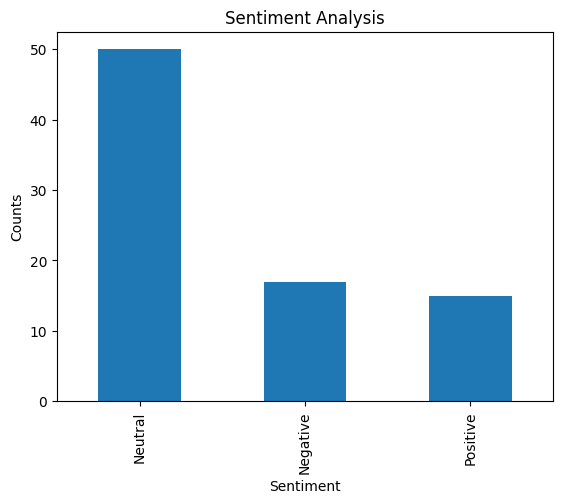

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tw_list['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
!pip install plotly-express